In [1]:
import numpy as np
from glob import glob
import os
import SimpleITK as sitk
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter, FuncFormatter

from skimage import measure
%matplotlib inline

In [2]:
MR_4DPWI = glob('Training/*/*.MR_4DPWI.*/*.nii')
MR_ADC   = glob('Training/*/*.MR_ADC.*/*.nii')
MR_MTT   = glob('Training/*/*.MR_MTT.*/*.nii')
MR_rCBF  = glob('Training/*/*.MR_rCBF.*/*.nii')
MR_rCBV  = glob('Training/*/*.MR_rCBV.*/*.nii')
MR_Tmax  = glob('Training/*/*.MR_Tmax.*/*.nii')
MR_TTP   = glob('Training/*/*.MR_TTP.*/*.nii')
OT       = glob('Training/*/*.OT.*/*.nii')

In [3]:
def get_array(image):
    sitk_img = sitk.ReadImage(image)
    img = sitk.GetArrayFromImage(sitk_img)
    return img

def get_bbox(label):
    labels = measure.label(label)
    regions = measure.regionprops(labels)
    min_row, min_col, max_row, max_col = regions[0].bbox
    return min_row, min_col, max_row, max_col

def get_center(label):
    min_row, min_col, max_row, max_col = get_bbox(label)
    
    cent_row = (max_row - min_row) // 2 + min_row
    cent_col = (max_col - min_col) // 2 + min_col
    
    return (cent_row, cent_col)

def label_img(image, label):
    return image * label

In [4]:
max_bbox_width  = 0
max_bbox_height = 0

for label in OT:
    lbls = get_array(label)
    for lbl in lbls:
        if lbl.sum() > 0:
            min_row, min_col, max_row, max_col = get_bbox(lbl)

            if max_row - min_row > max_bbox_width:
                max_bbox_width = max_row - min_row
            if max_col - min_col > max_bbox_height:
                max_bbox_height = max_col - min_col

print("Max Width  of bbox : ", max_bbox_width)
print("Max Height of bbox : ", max_bbox_height)

Max Width  of bbox :  131
Max Height of bbox :  61


In [5]:
import matplotlib.patches as mpatches
# http://scikit-image.org/docs/dev/auto_examples/segmentation/plot_label.html

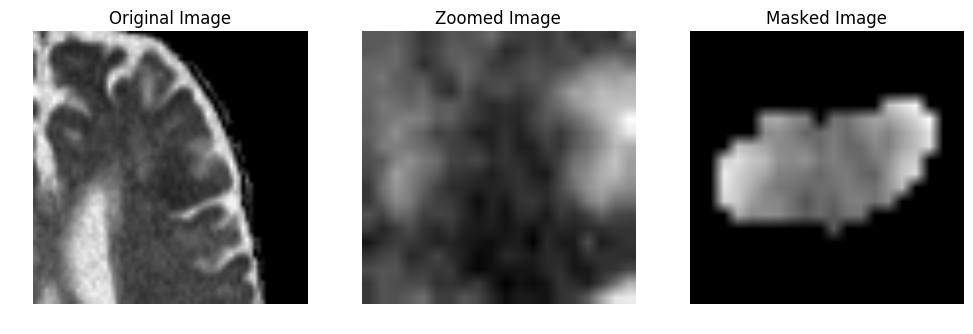

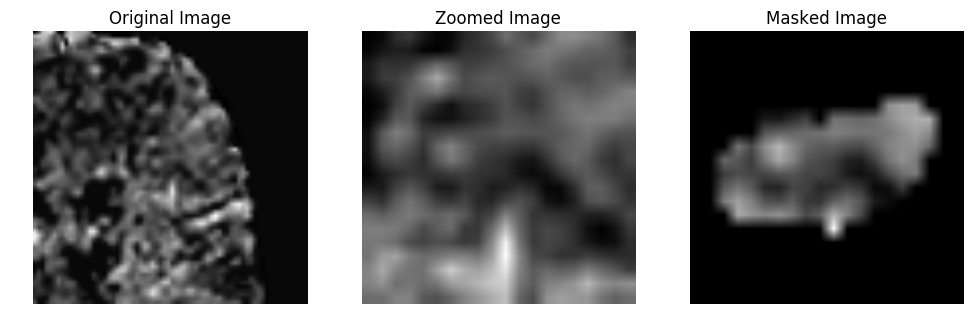

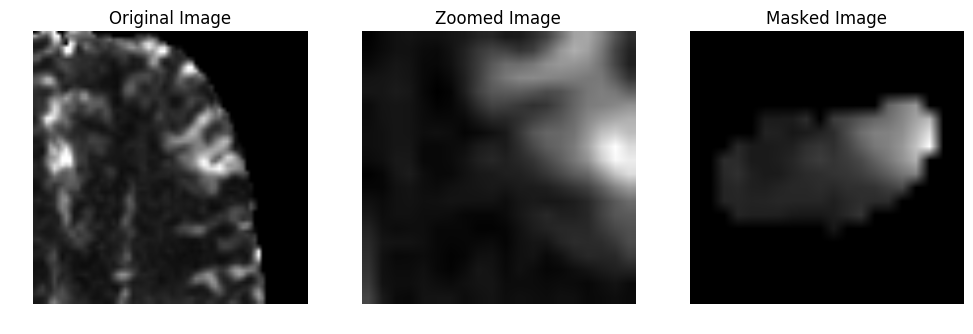

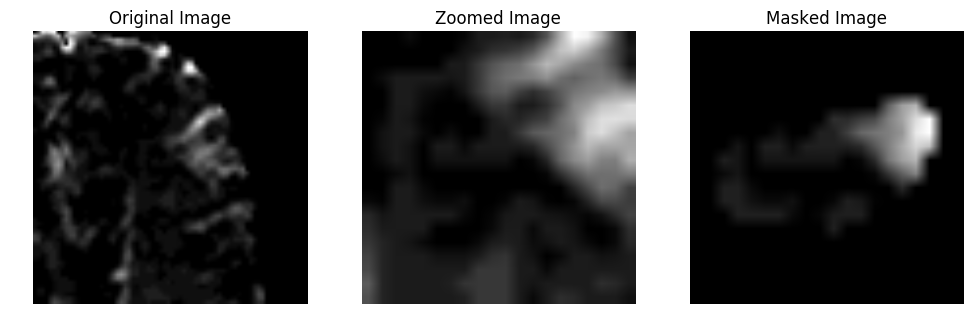

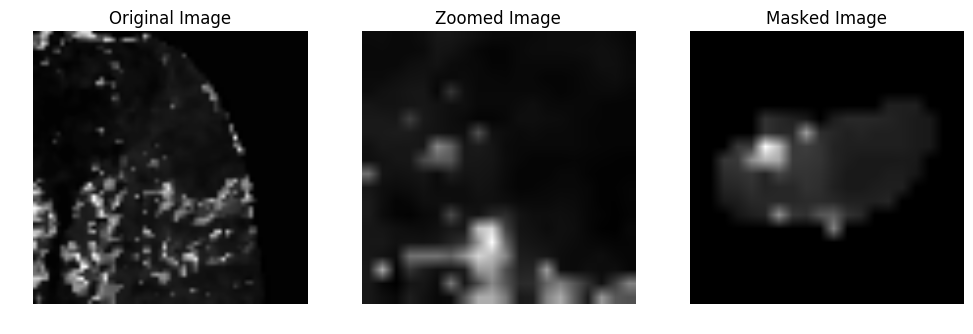

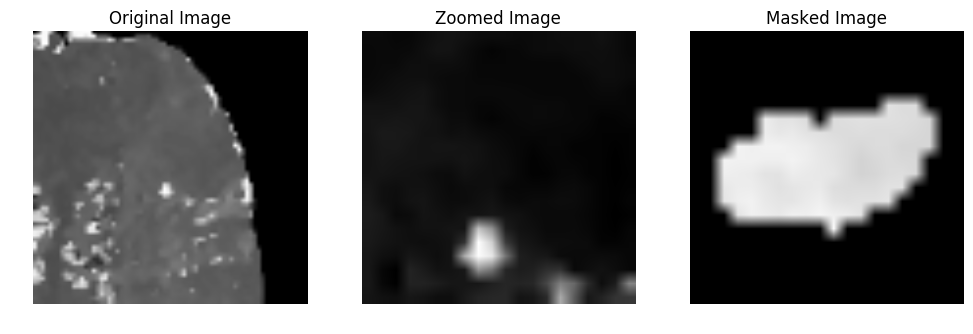

In [8]:
patient_n = 0

image_set = [MR_4DPWI[patient_n], MR_ADC[patient_n], MR_MTT[patient_n], MR_rCBF[patient_n], MR_rCBV[patient_n], MR_Tmax[patient_n], MR_TTP[patient_n]]
zoom_size = 20
original_size = 70

for img_set in image_set[1:]:
    imgs = get_array(img_set)
    lbls = get_array(OT[patient_n])
    
    for img, lbl in zip(imgs, lbls):
        if lbl.sum() > 0:
            cent_row, cent_col = get_center(lbl)
            mask = img * lbl
            
            plt.figure(figsize=(12,36))
            plt.subplot(1,3,1); plt.axis('off'); plt.title('Original Image')
#            minr, minc, maxr, maxc = get_bbox(label)
#            rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
#                                  fill=False, edgecolor='red', linewidth=2)
#            ax.add_patch(rect)
            plt.imshow(img[cent_row-original_size//2:cent_row+original_size//2, cent_col-original_size//2:cent_col+original_size//2], 'gray')
            
            
            plt.subplot(1,3,2); plt.axis('off'); plt.title('Zoomed Image')
            plt.imshow(img[cent_row-zoom_size//2:cent_row+zoom_size//2, cent_col-zoom_size//2:cent_col+zoom_size//2], 'gray')
            plt.subplot(1,3,3); plt.axis('off'); plt.title('Masked Image')
            plt.imshow(mask[cent_row-zoom_size//2:cent_row+zoom_size//2, cent_col-zoom_size//2:cent_col+zoom_size//2], 'gray')
            plt.show()

            break